In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline 

# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте файлы [на странице задания] и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [19]:
osc_data_train = pd.read_csv('DATA/orange_small_churn_data.train')

In [20]:
osc_labels_train = pd.read_csv('DATA/orange_small_churn_labels.train', header=None, names=['labels'])

2\. Рассчитайте доли классов `отток` и `не отток`.

In [21]:
osc_labels_train.labels.replace([1,-1], ['отток', 'не отток']).value_counts()

не отток    37024
отток        2976
Name: labels, dtype: int64

In [22]:
osc_labels_train.labels.value_counts()

-1    37024
 1     2976
Name: labels, dtype: int64

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://stepik.org/lesson/90035/step/3?unit=66281 

In [23]:
osc_data_label = pd.concat([osc_data_train, osc_labels_train], axis = 1)

In [24]:
numeric_data = osc_data_label.iloc[:, 0:190]
columns = osc_data_label.columns

In [25]:
def normalize(s):
    if sum(s.isnull()) == len(s):
        return np.nan
        #print("NAN")
    mean = np.array(s.dropna()).mean()
    prb = 1 / len(s)
    #std = np.array(s.dropna()).std()
    s.fillna(mean, inplace=True)
    s.apply(lambda x: x * prb)
    a = s[osc_data_label.labels == -1].sum()
    b = s[osc_data_label.labels == 1].sum()
    return(a - b)

In [26]:
corr = []
corr_nan = []
for col in columns[:190]:
    val = np.abs(normalize(numeric_data[col]))
    if np.isnan(val):
        corr_nan.append(col)
    else:
        corr.append((col, val))

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [27]:
# Python program to sort a list of 
# tuples by the second Item using sort()  
  
# Function to sort hte list by second item of tuple 
def Sort_Tuple(tup):  
  
    # reverse = None (Sorts in Ascending order)  
    # key is set to sort using second element of  
    # sublist lambda has been used  
    tup.sort(key = lambda x: x[1], reverse=True)  
    return tup  
  
# Driver Code  
#tup = [('rishav', 10), ('akash', 5), ('ram', 20), ('gaurav', 15)]  
  
# printing the sorted list of tuples 
sort_corr = Sort_Tuple(corr)


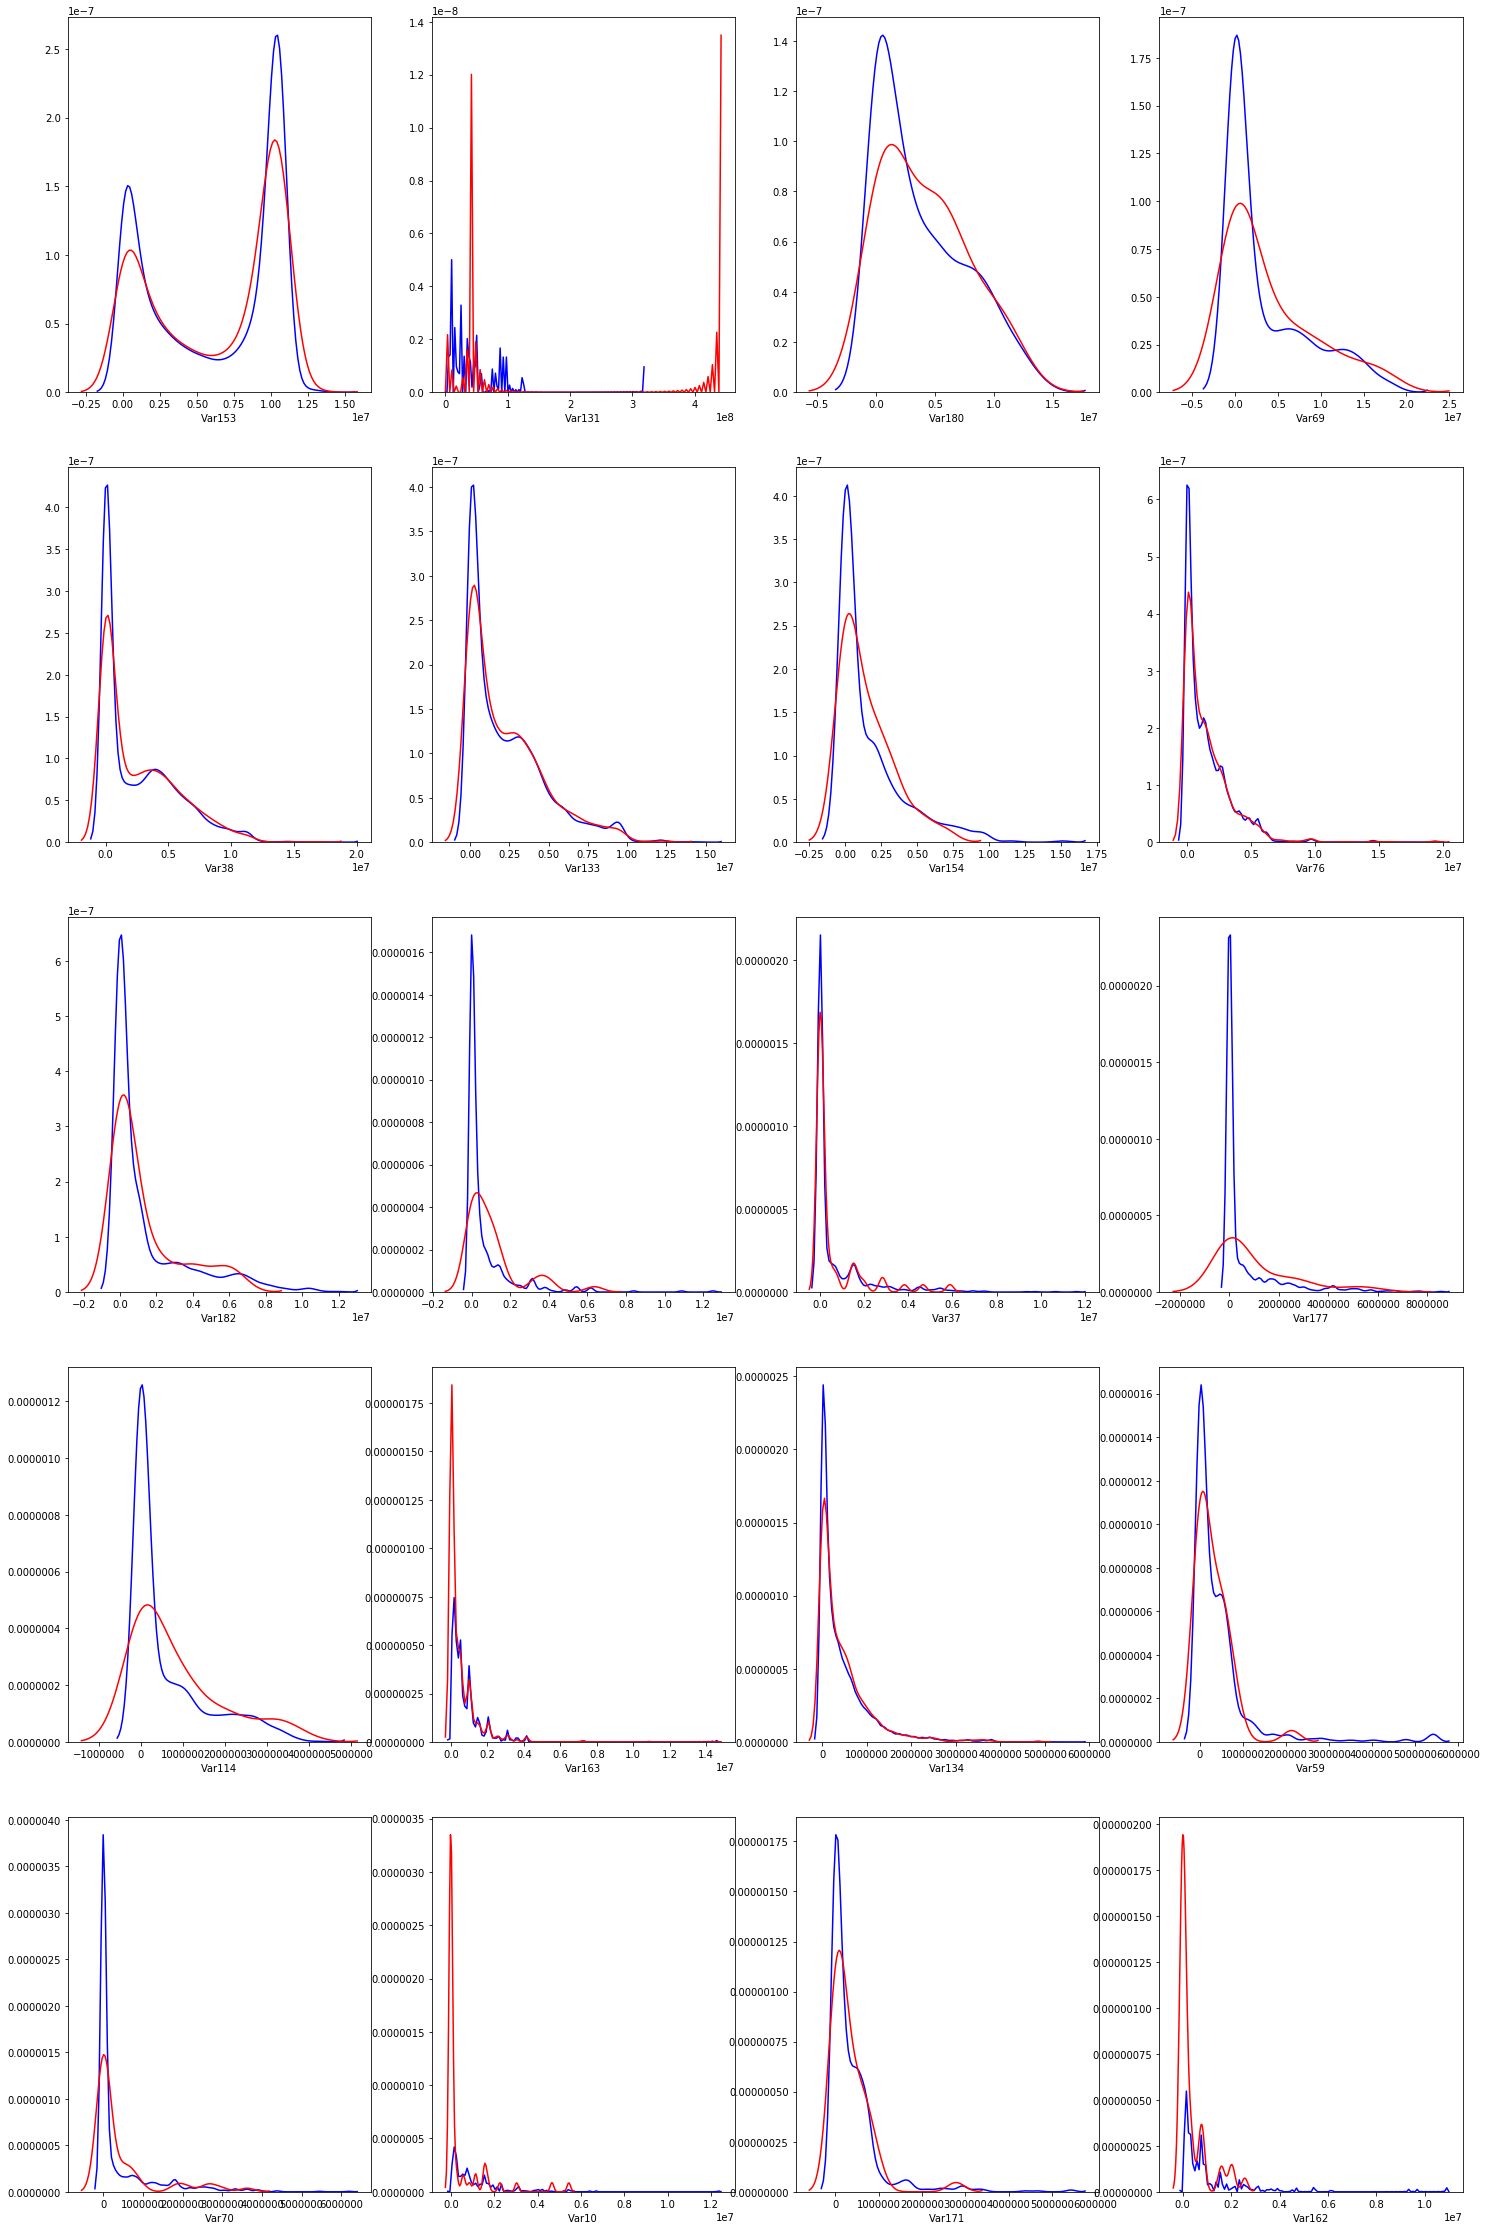

In [34]:
import seaborn as sns

plt.figure(figsize=(25, 40))
plot_number = 0
variables = []
for (idx, column) in enumerate(sort_corr[:20]):
    column = column[0]
    #print(column)
    plot_number += 1
    variables.append(column)
    plt.subplot(5, 4, plot_number)
    colors = {-1: 'b', 1: 'r'}
    for element in [-1, 1]:
        sns.distplot(osc_data_label[osc_data_label['labels'] == element][column], color=colors[element], hist=False)
        
plt.show()

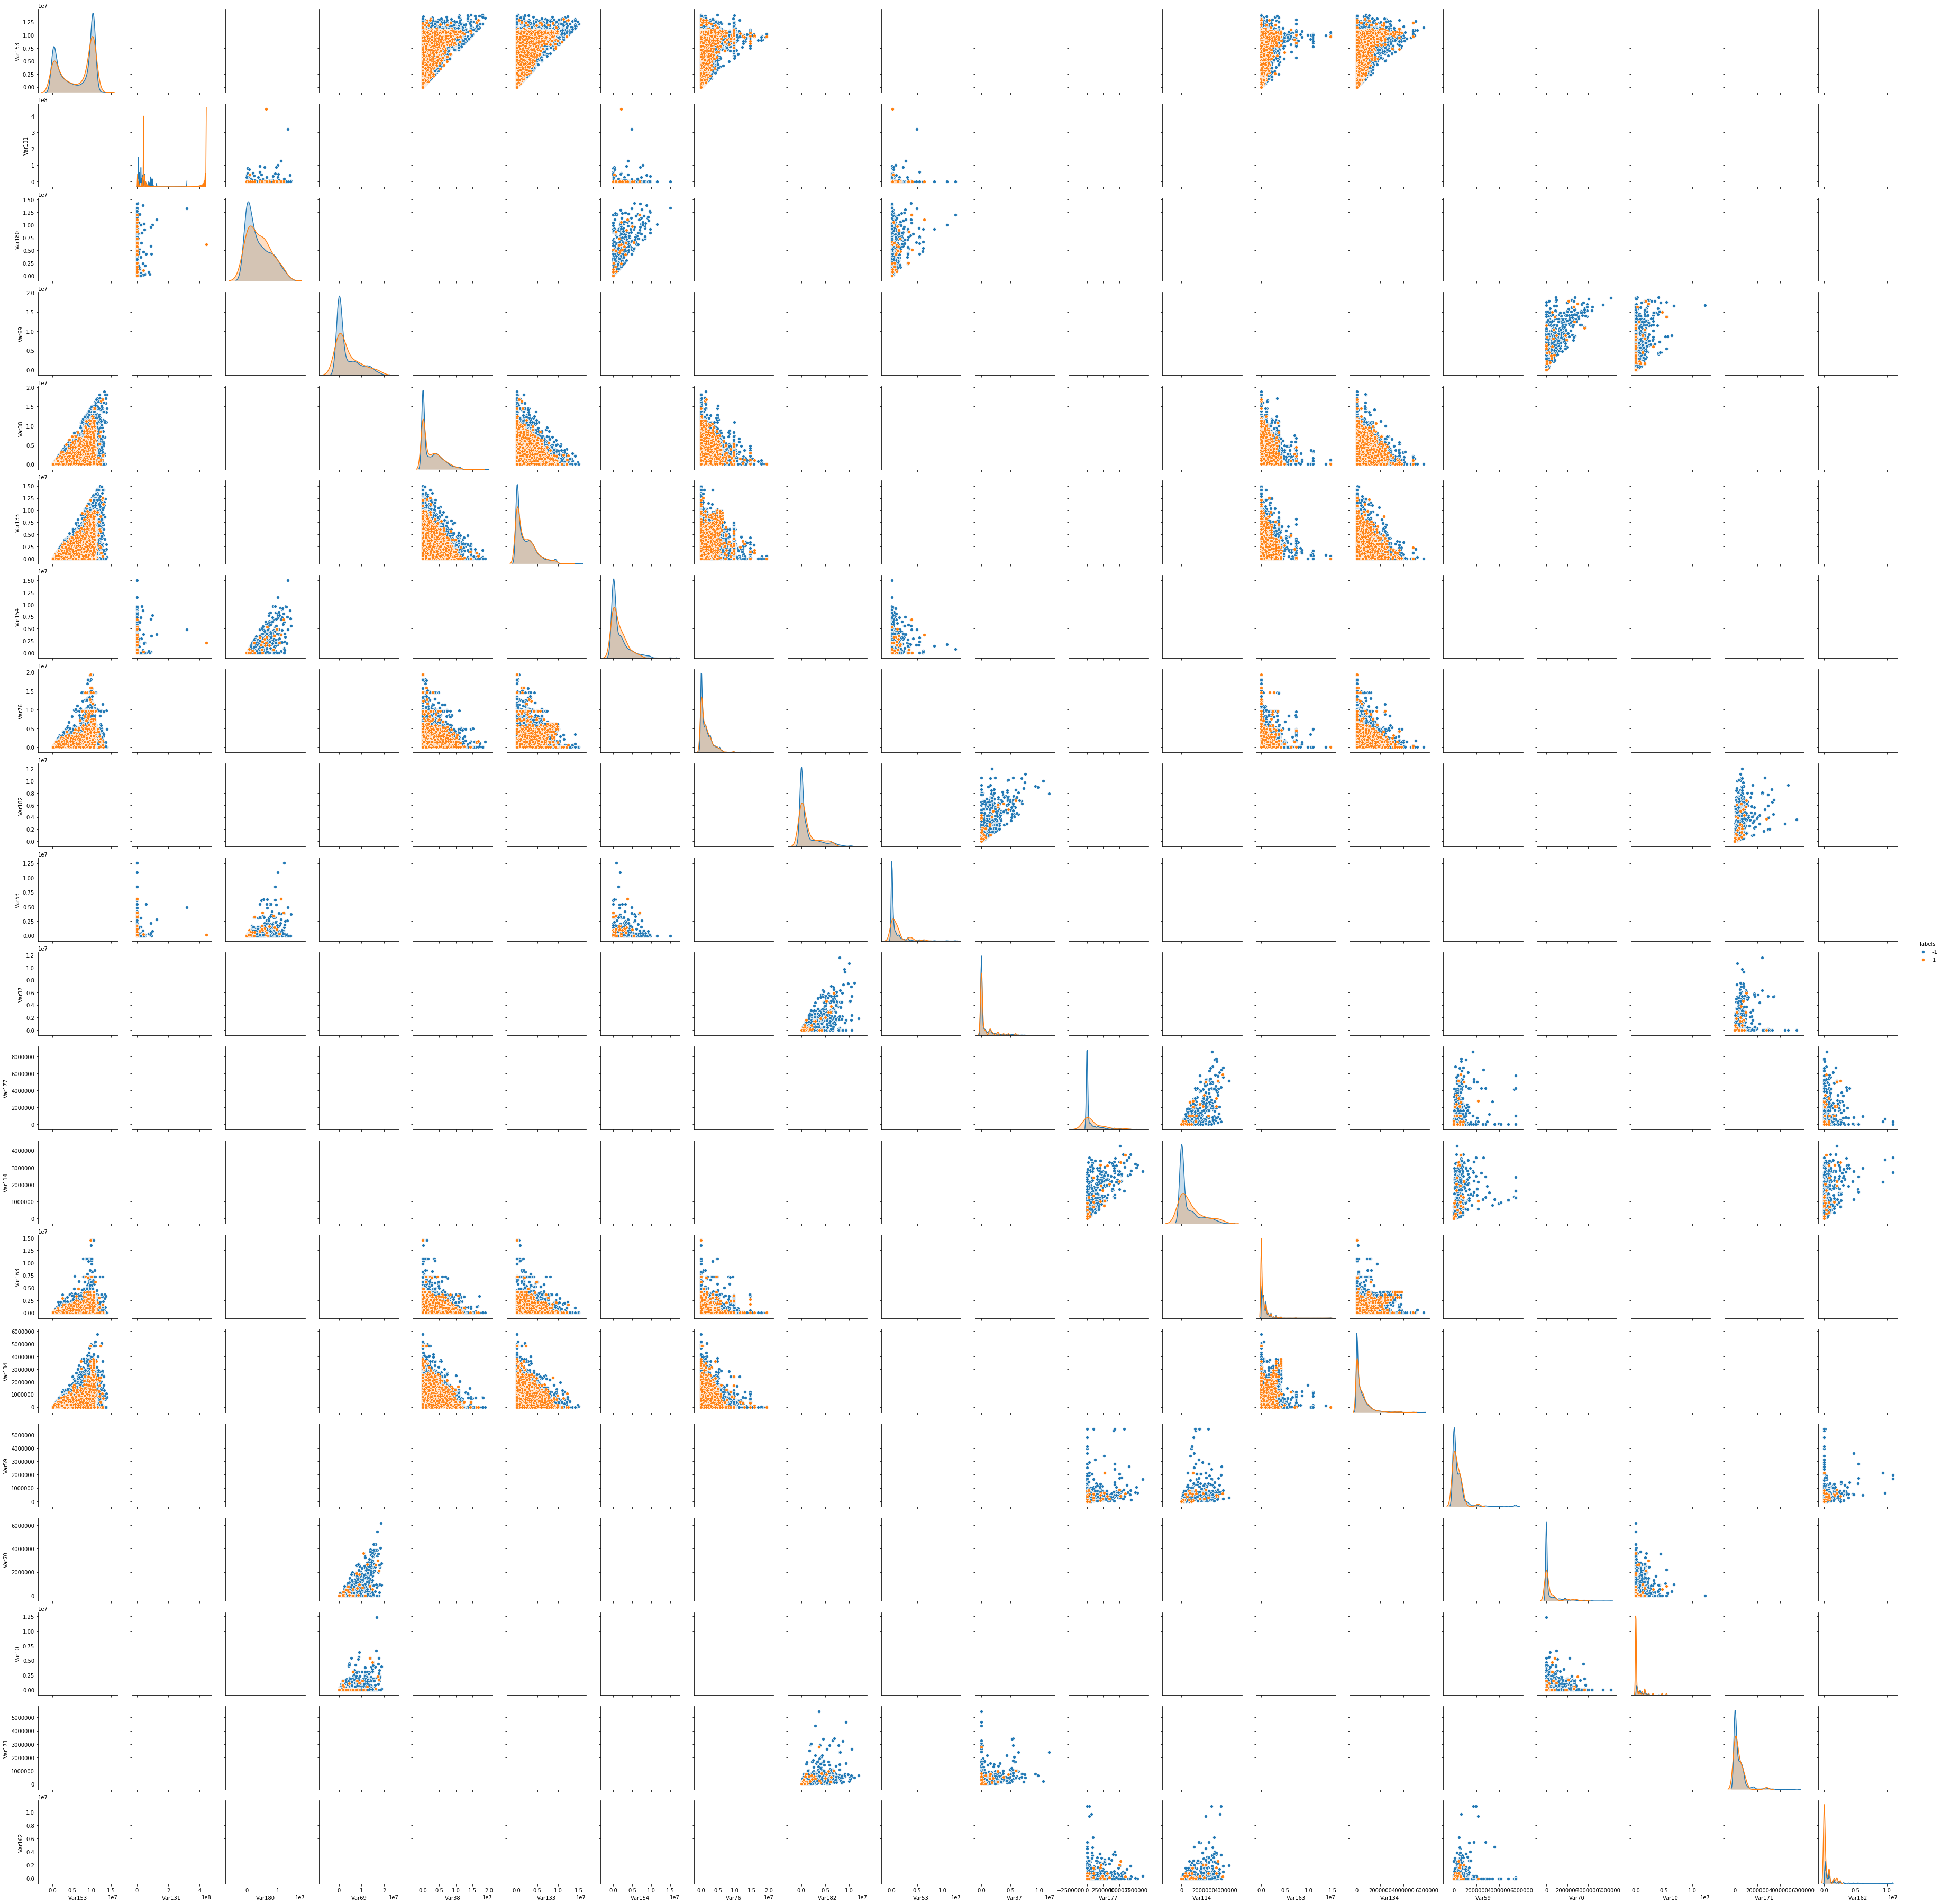

In [94]:
sns.pairplot(osc_data_label, hue='labels', vars=variables)

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [86]:
numerical_features = columns[:190]

In [100]:
plot_number = 0
variables = []
while plot_number < 10:
    var = np.random.choice(numerical_features)
    if (var not in variables) and (sum(osc_data_label[var].isnull()) != osc_data_label.shape[0]):
        variables.append(var)
        plot_number += 1

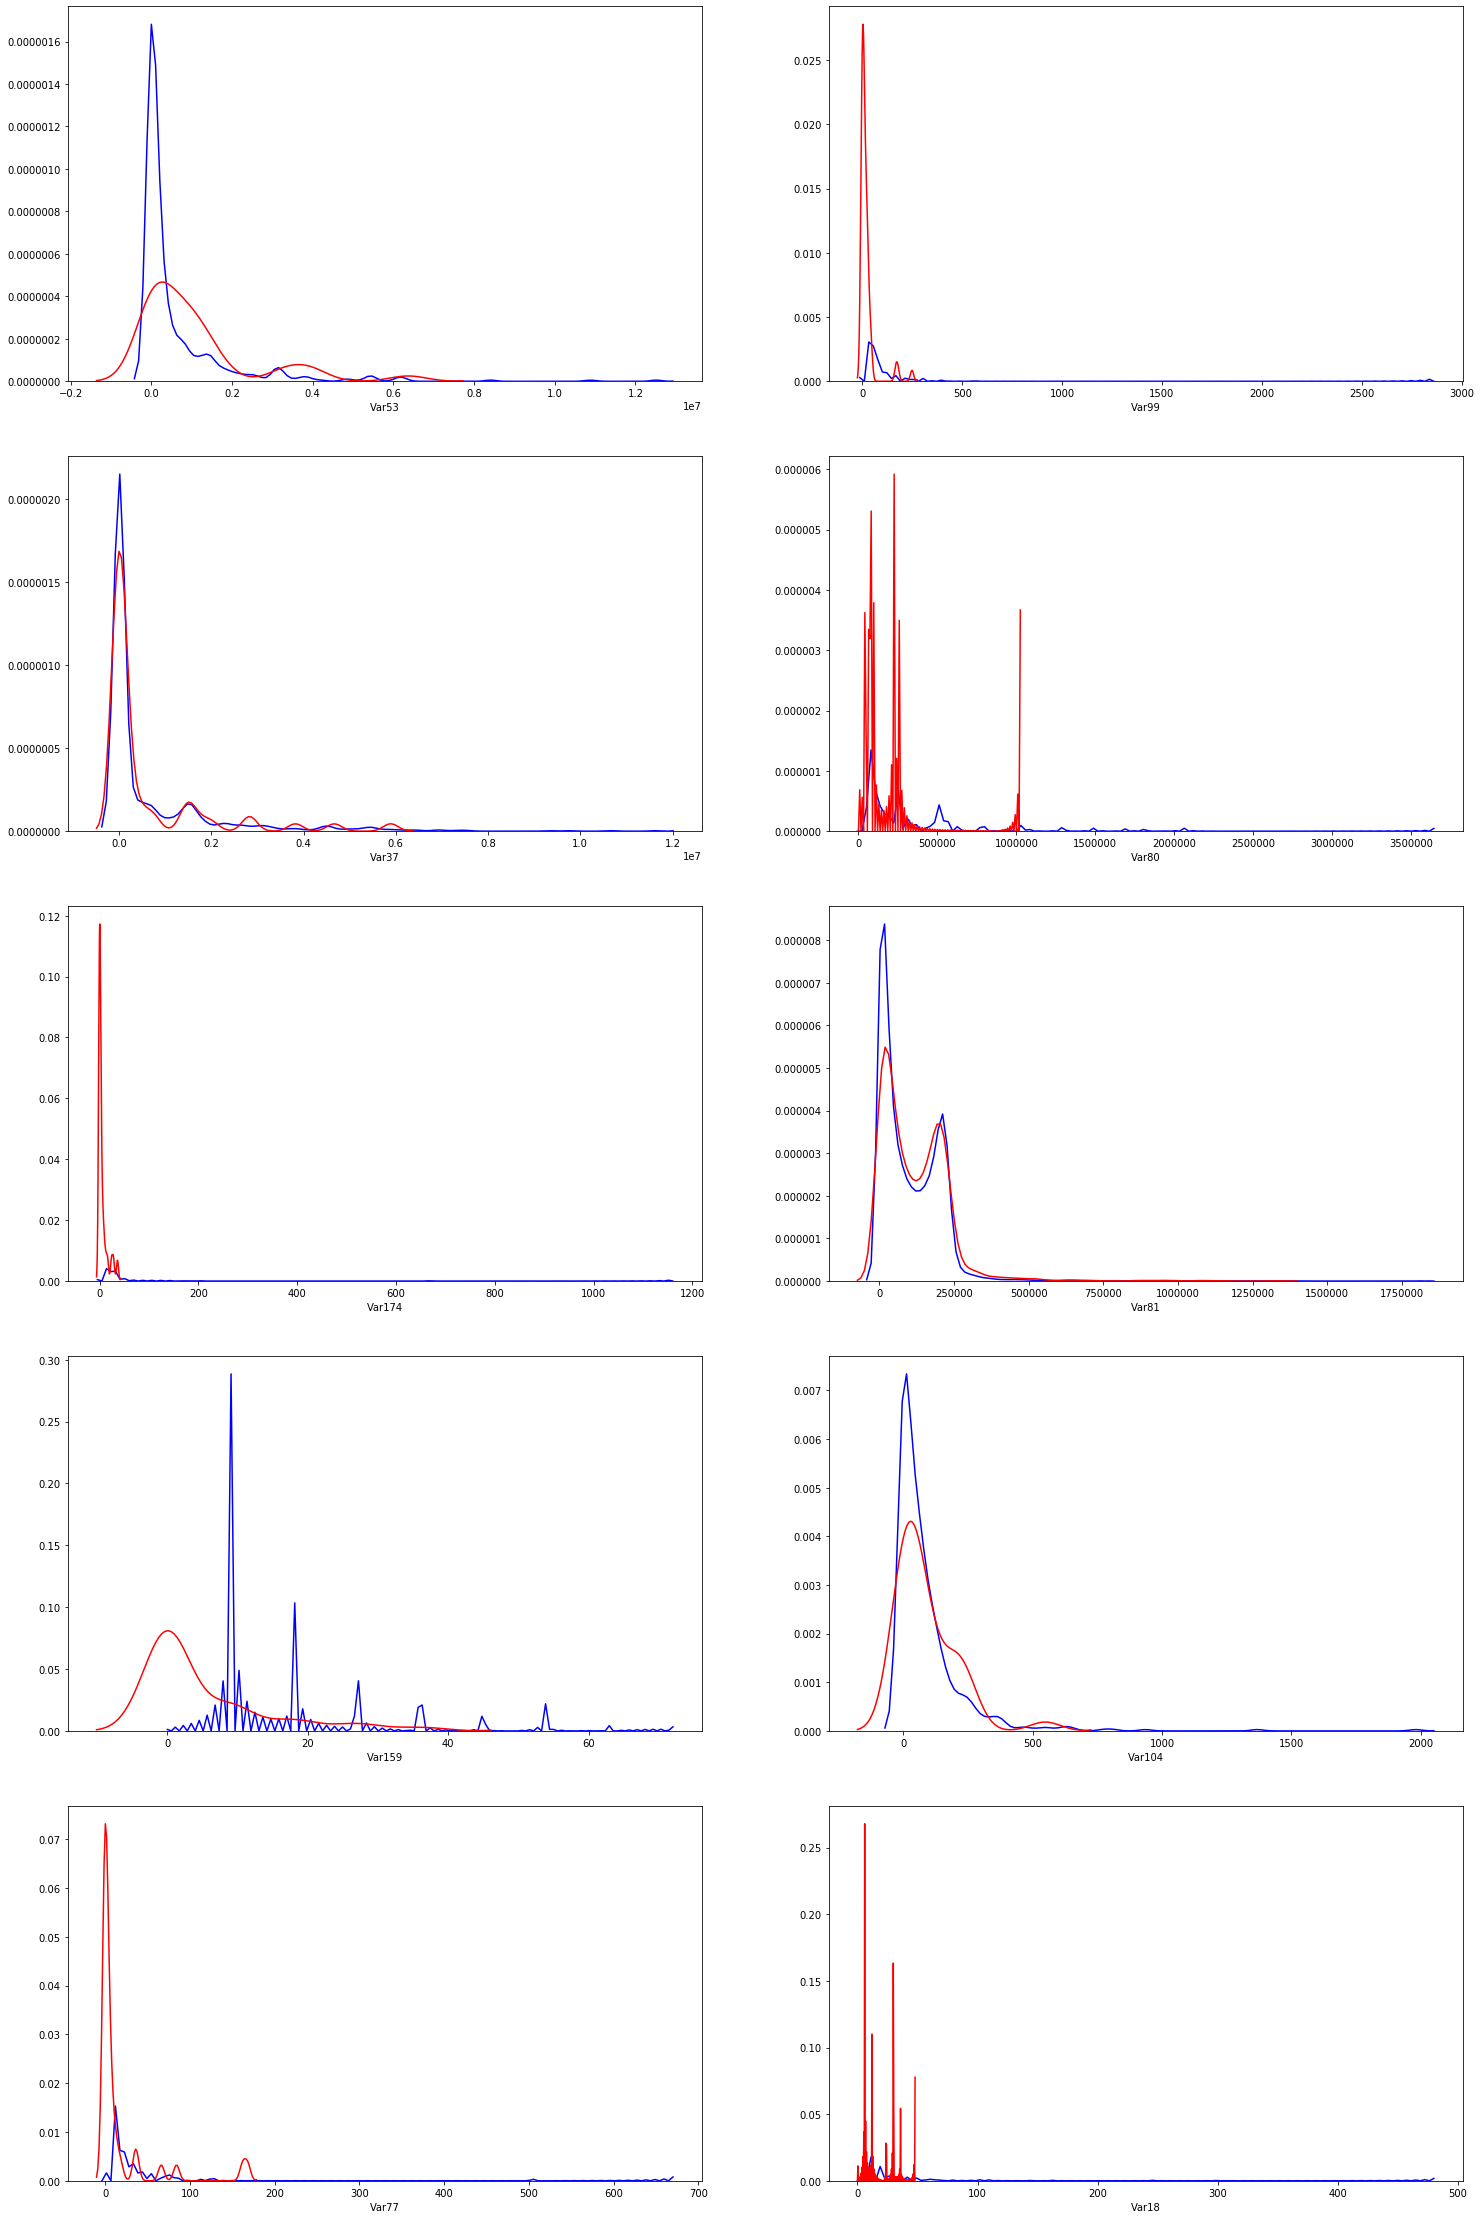

In [101]:
plt.figure(figsize = (25, 40))
plot_number = 0
for column in variables:
    plot_number += 1
    plt.subplot(5, 2, plot_number)
    colors = {-1: 'b', 1: 'r'}
    for element in [-1, 1]:
        sns.distplot(osc_data_label[osc_data_label['labels'] == element][column], color=colors[element], hist=False)

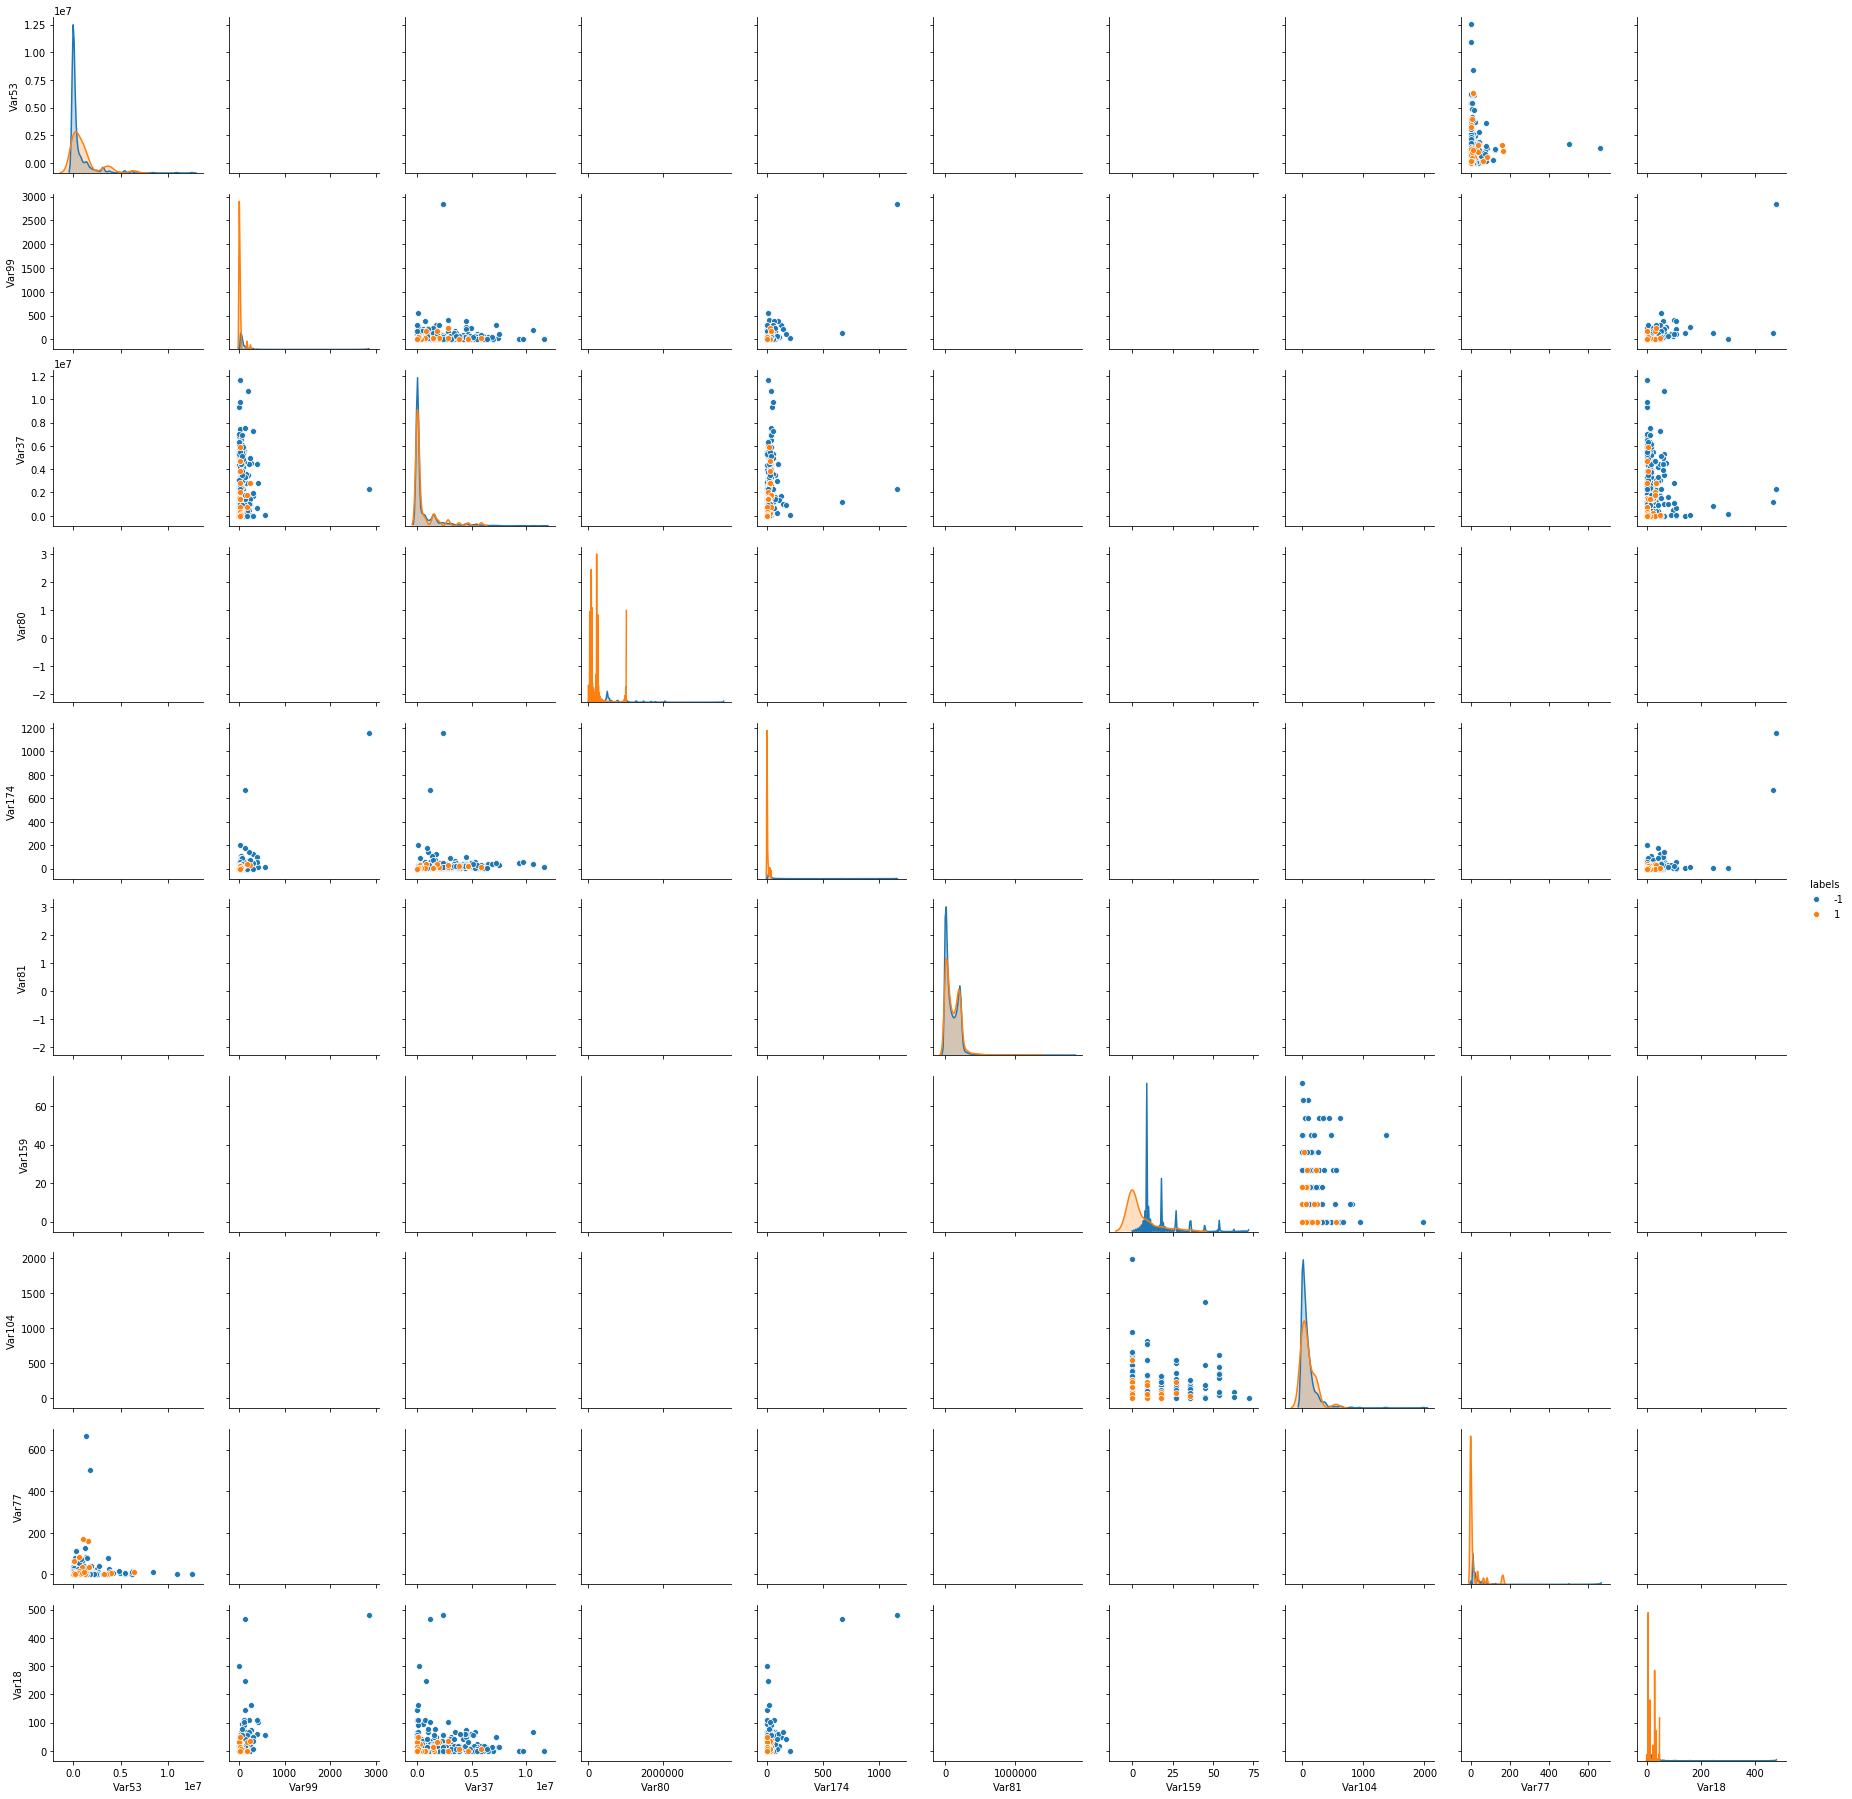

In [102]:
sns.pairplot(osc_data_label, hue='labels', vars=variables)

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [103]:
# Python program to sort a list of 
# tuples by the second Item using sort()  
  
# Function to sort hte list by second item of tuple 
def Sort_Tuple(tup):  
  
    # reverse = None (Sorts in Ascending order)  
    # key is set to sort using second element of  
    # sublist lambda has been used  
    tup.sort(key = lambda x: x[1])  
    return tup  
  
# Driver Code  
#tup = [('rishav', 10), ('akash', 5), ('ram', 20), ('gaurav', 15)]  
  
# printing the sorted list of tuples 
sort_corr_neg = Sort_Tuple(corr)

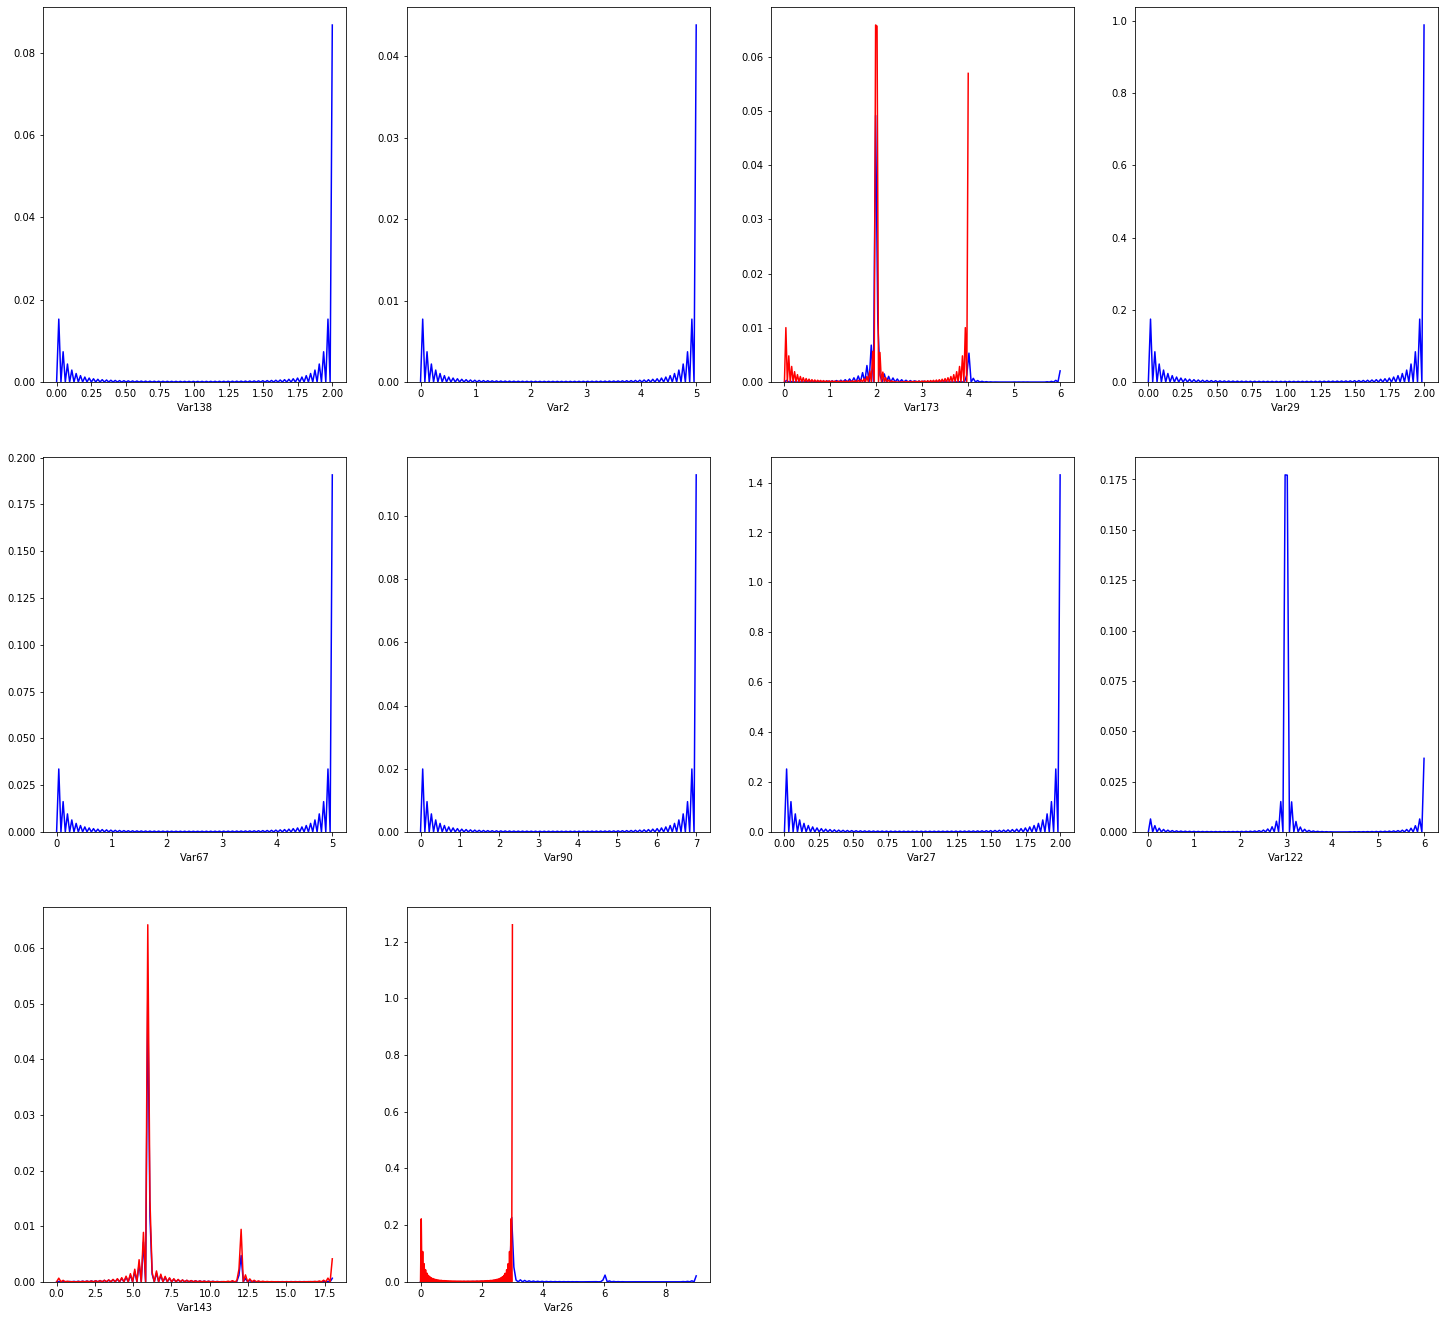

In [104]:
import seaborn as sns

plt.figure(figsize=(25, 40))
plot_number = 0
variables = []
for (idx, column) in enumerate(sort_corr_neg[:10]):
    column = column[0]
    #print(column)
    plot_number += 1
    variables.append(column)
    plt.subplot(5, 4, plot_number)
    colors = {-1: 'b', 1: 'r'}
    for element in [-1, 1]:
        sns.distplot(osc_data_label[osc_data_label['labels'] == element][column], color=colors[element], hist=False)
        
plt.show()

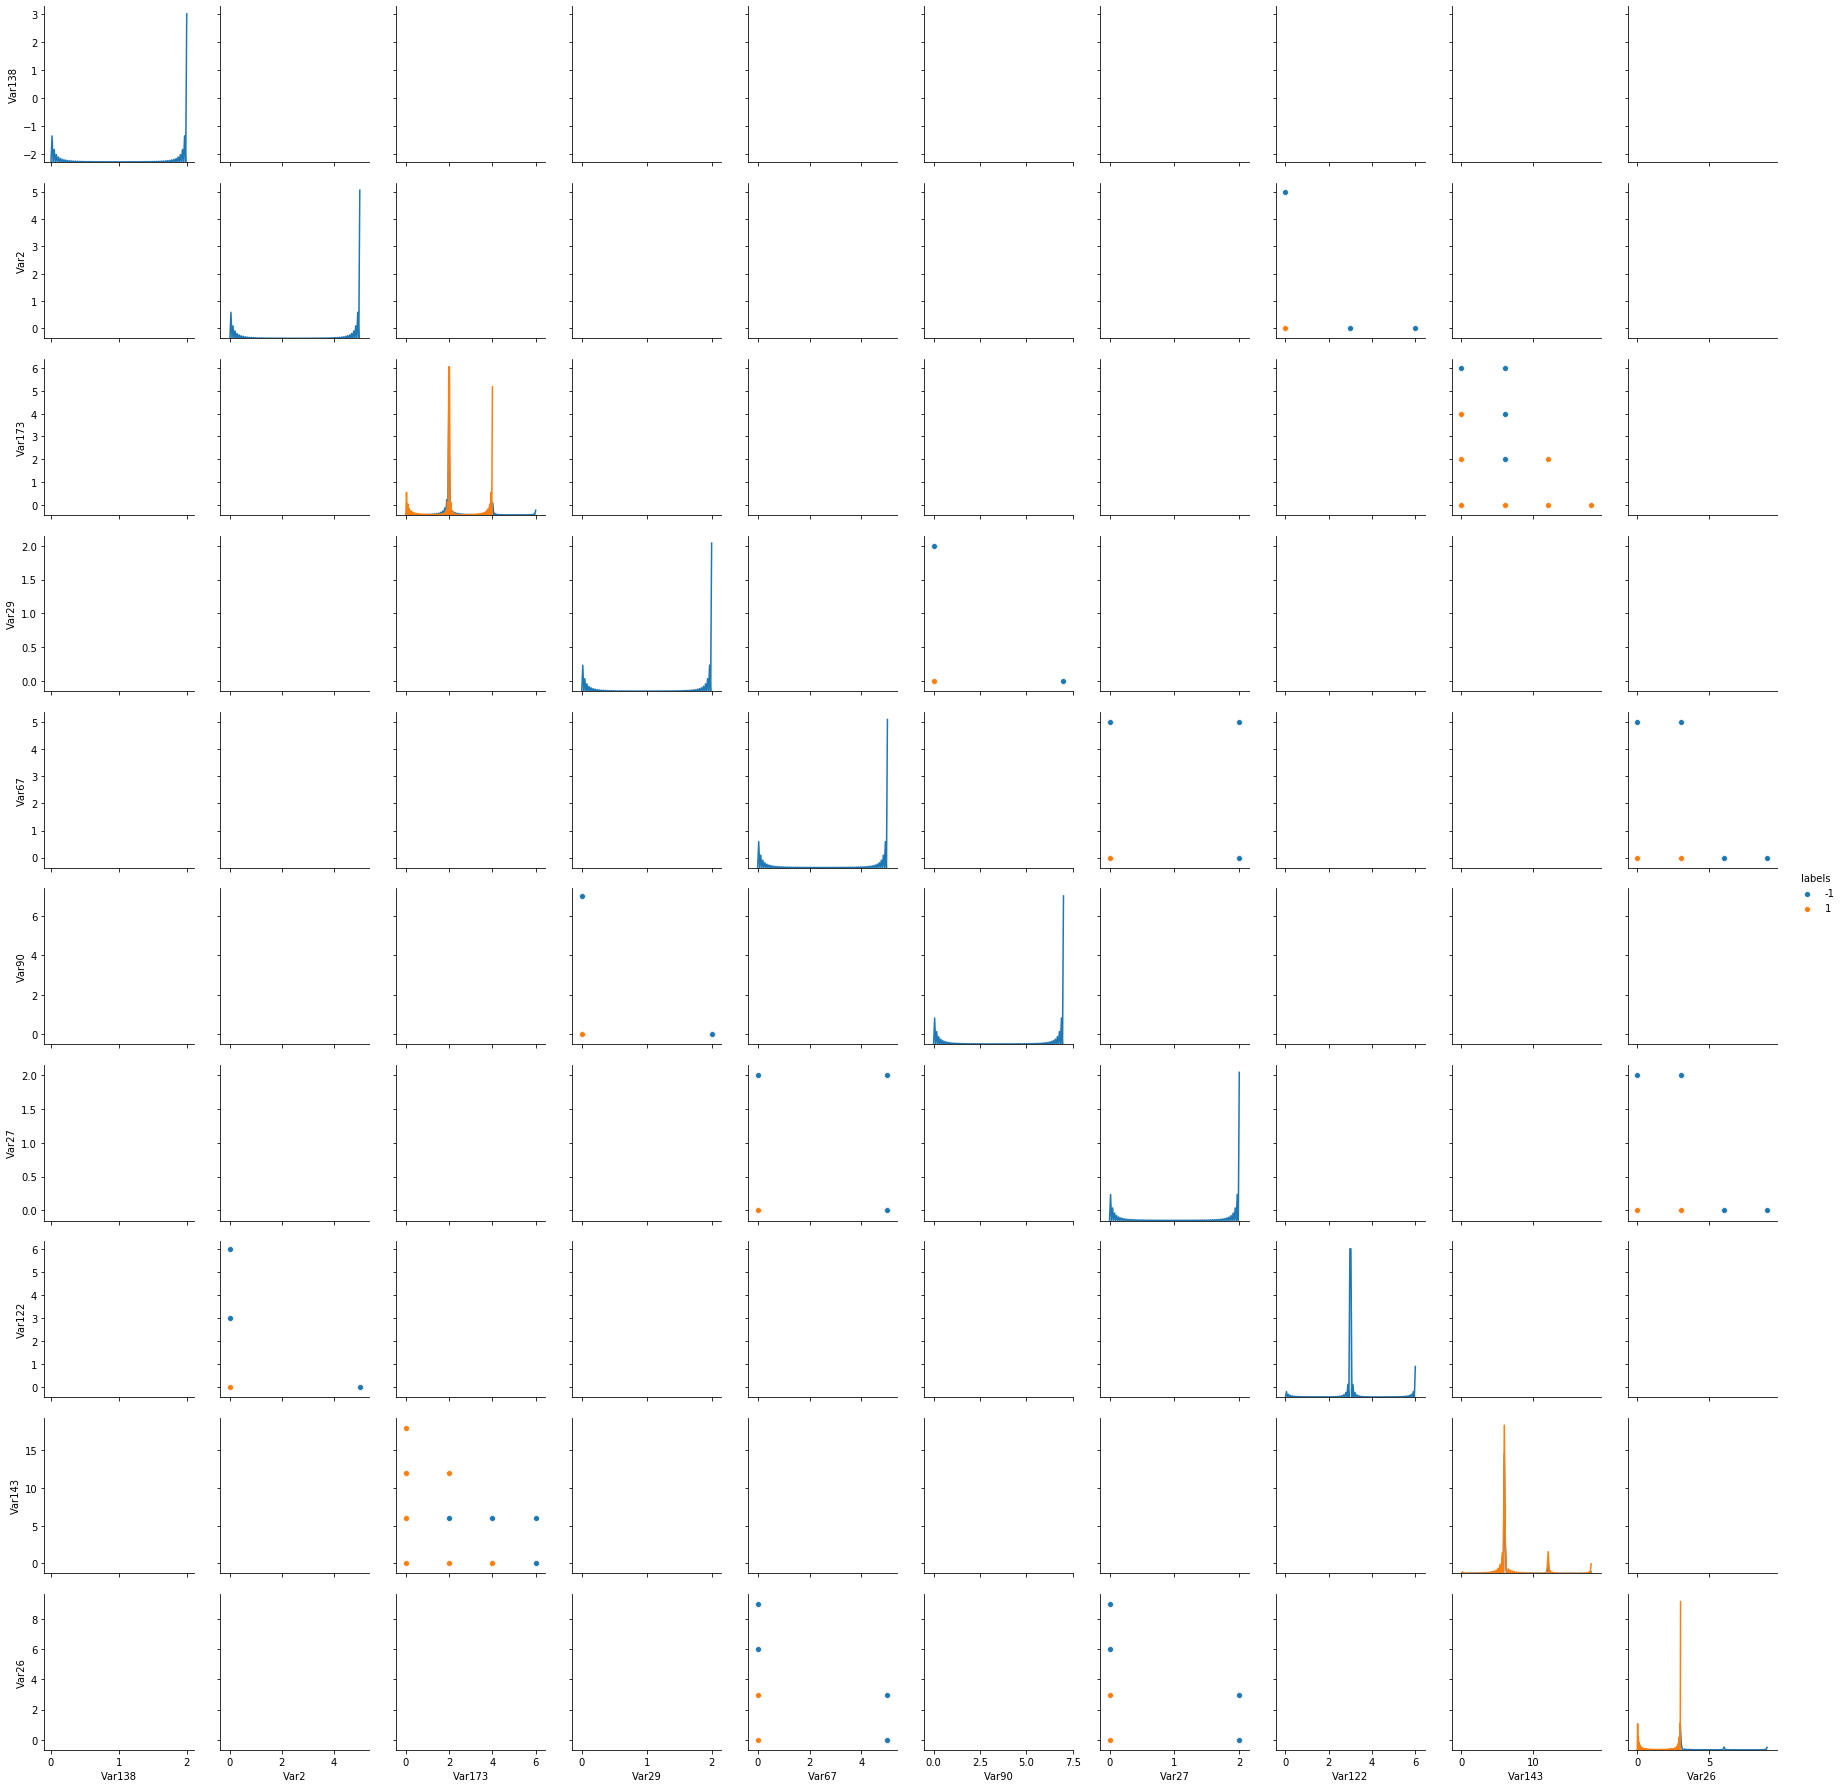

In [105]:
sns.pairplot(osc_data_label, hue='labels', vars=variables)

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [120]:
categories = columns[190:len(columns)-1]

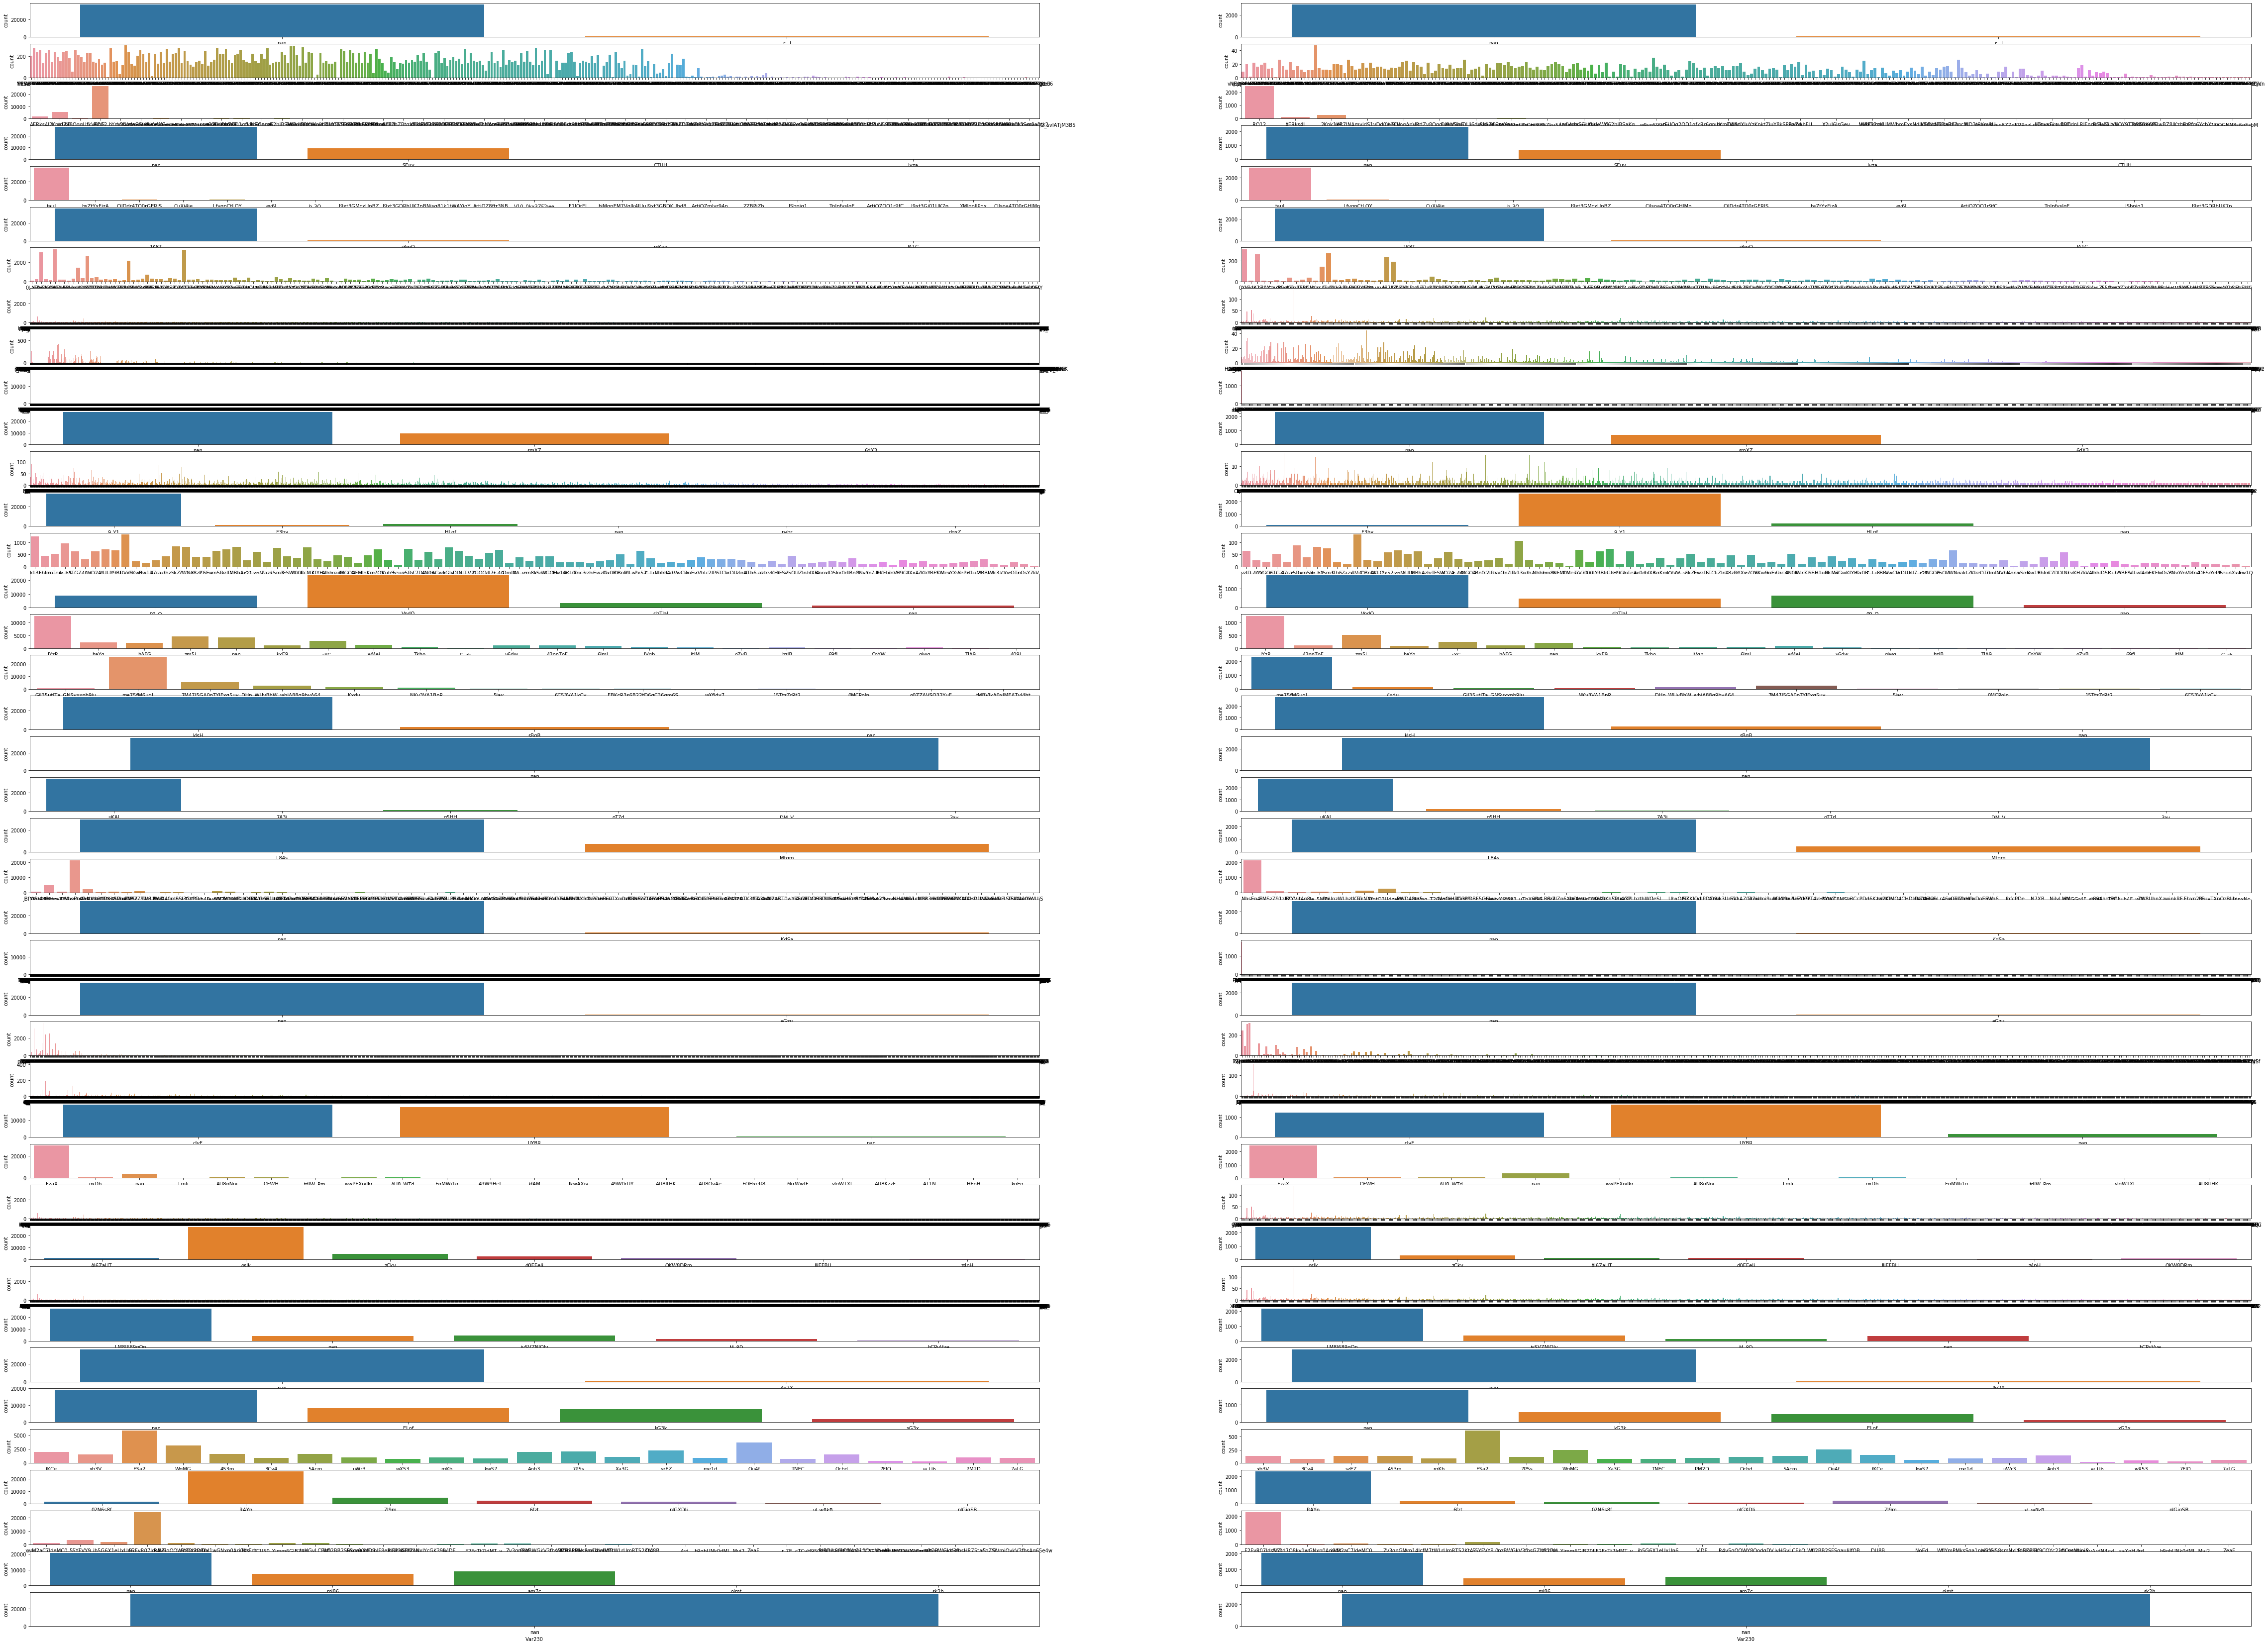

In [131]:
fig, axs = plt.subplots(len(categories),2, figsize = (80,60))
for idx, cat in enumerate(categories):
    #print(idx)
    osc_data_label[cat] = osc_data_label[cat].apply(lambda x: str(x))
    ax = sns.countplot(x=cat, data=osc_data_label[osc_data_label.labels == -1], ax = axs[idx,0])
    ax = sns.countplot(x=cat, data=osc_data_label[osc_data_label.labels == 1], ax = axs[idx,1])
    #print(cat)

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

* есть данные,которые полностью состоят из Nan или в которых много пропусков
* 153, 131, 180
* 138, 2, 173
* данные сильно зашумлены. надо чистить